# Capstone 2 
# **The Shift in World's Energy Mix: Carbon Emissions from Conventional to Renewable Sources, 1962 - 2022**

## Background

The world’s energy demand continues to rise, while the environmental impacts follow a linear trend. In the other hand, oil crisis in 70's century lead europe to find teh replacement of the energy sources. In an effort to meet this growing demand while reducing emissions, companies are investing heavily in renewable energy generation. It remains a learning curve—one that is still ongoing and continuously developing.

The questions is = ' ‘Does the usage of renewable energy really decrease the gas emissions?’

Time frame = 1962 - 2022 (the last 6 decade)
Big overview -> energy emission trend from 1962 - 2022 where fossil vs renewable

- Q1. Annual Convention Energy Carbon Emission 
    - How is the correlation between a country's convention energy and its annual carbon emissions the last 6 decades?
- Q2. Annual Renewable Energy Emission
    - What is the correlation between a country's renewable energy and its annual emissions the last 6 decades?
- Gas Emission Trend
    - How is the proportion of gas emission type and countries who produce the emission globally?
- GDP and Population Relation to Energy Consumption?
    - How do economic factors, like GDP, correlate with CO2 emissions in countries?
- Convention Energy vs Renewable Energy
    - How is the trend between convention energy consumption with renwable energy consumption?

In [1035]:
import pandas as pd
import numpy as np
import http.client
import json

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **A. Data Gathering**

Imported files
- Carbon Emission per Capita : X
- Energy Consumption : Y
- Countries Emission : Z

### **1. The Global Carbon Project's fossil CO2 emissions dataset**

In [ ]:
# Carbon Emission per Capita
X = pd.read_csv('/GCB2023v43_percapita_flat.csv')

X.rename(columns={'ISO 3166-1 alpha-3': 'Code'}, inplace=True)      # Change title
X.rename(columns={'UN M49': 'Numerical Code'}, inplace=True)        # Change title
X

### **2. The Global Energy Consumption dataset**

In [ ]:
Y = pd.read_csv('/owid-energy-data.csv')
Y

### **3. Climate Trace API**

In [ ]:
# Countries Emission
alpha3_codes = []
conn = http.client.HTTPSConnection('api.climatetrace.org')
conn.request('GET', '/v6/definitions/countries')
res = conn.getresponse()

countries_data = res.read()
countries = json.loads(countries_data.decode('utf-8'))

# Extract all alpha3 codes
alpha3_codes = [country['alpha3'] for country in countries]

# Create a dictionary for looping
countries_dict = {country['alpha3']: country for country in countries}

In [ ]:
alphaString = ",".join(alpha3_codes)

# Request emissions data for all countries
conn2 = http.client.HTTPSConnection("api.climatetrace.org")
conn2.request("GET", f"/v6/country/emissions?countries={alphaString}")
res2 = conn2.getresponse()

emission_data = res2.read()
emissions = json.loads(emission_data.decode("utf-8"))

In [775]:
print(countries[0].keys())

dict_keys(['alpha3', 'alpha2', 'name', 'continent'])


In [776]:
print(emissions[0].keys())

dict_keys(['country', 'continent', 'rank', 'previousRank', 'assetCount', 'emissions', 'worldEmissions', 'emissionsChange'])


In [ ]:
# Convert lists to DataFrames
df_countries = pd.DataFrame(countries)   

# If 'emissions' is a dict
if isinstance(emissions, dict):
    df_emissions = pd.DataFrame([emissions])   
else:
    df_emissions = pd.DataFrame(emissions)     

df_emissions = df_emissions.rename(columns={"country": "alpha3"})

# Merge
df_merged = pd.merge(df_emissions, df_countries, on="alpha3", how="left")

In [ ]:
# Expand emissions dict
emissions_expanded = df_merged["emissions"].apply(pd.Series)
world_expanded = df_merged["worldEmissions"].apply(pd.Series)
change_expanded = df_merged["emissionsChange"].apply(pd.Series)

# Add suffixes
emissions_expanded = emissions_expanded.add_prefix("emissions_")
world_expanded = world_expanded.add_prefix("worldEmissions_")
change_expanded = change_expanded.add_prefix("emissionsChange_")

# Concatenate back to main dataframe
Z_clean = pd.concat(
    [df_merged.drop(["emissions", "worldEmissions", "emissionsChange"], axis=1),
     emissions_expanded, world_expanded, change_expanded],
    axis=1
)

Z_clean.to_csv("Emissions Countries.csv", index=False, encoding="utf-8")

In [ ]:
Z = Z_clean 
Z

In [ ]:
# Create summaries column
Z['Total Emission'] = Z['emissions_co2'] + Z['emissions_ch4'] + Z['emissions_n2o']
Z['Total Emission (Billion)'] = Z['Total Emission'] / 1e9
Z['Total World Emission'] = Z['worldEmissions_co2'] + Z['worldEmissions_ch4'] + Z['worldEmissions_n2o']
Z['Worldwide Percentage'] = Z['Total Emission']/Z['Total World Emission']

In [ ]:
# Import data to excel
Z.to_excel("Gas Emission.xlsx", index=False)

### **B. Data Cleaning**

#### **Get Top 5 highest renewable consumers countries's globally list for the last 60 years**

In [1037]:
Y.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Renewable Energy,Convention Energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.87,1.550,NaN,569.557,NaN,NaN,NaN,NaN,NaN,76.03,NaN,NaN,NaN,NaN,20.081,NaN,378.61,NaN,378.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.36,NaN,NaN,80.653,NaN,NaN,NaN,NaN,NaN,164.26,NaN,NaN,NaN,NaN,NaN,43.385,NaN,215.64,NaN,NaN,NaN,NaN,50.45,NaN,13.325,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65.07,NaN,NaN,NaN,NaN,NaN,17.187,NaN,NaN,22.80,16.93,NaN,NaN,NaN,NaN,NaN,6.022,4.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.46,1.596,NaN,567.642,NaN,NaN,NaN,NaN,NaN,86.26,NaN,NaN,NaN,NaN,21.307,NaN,404.85,NaN,404.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.66,NaN,NaN,80.934,NaN,NaN,NaN,NaN,NaN,190.41,NaN,NaN,NaN,NaN,NaN,47.032,NaN,229.81,NaN,NaN,NaN,NaN,54.33,NaN,13.420,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,50.99,NaN,NaN,NaN,NaN,NaN,12.595,NaN,NaN,22.86,16.40,NaN,NaN,NaN,NaN,NaN,5.647,4.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,0.

In [ ]:
# Add total of renewable energy and convention energy column for filtering 
Y['Renewable Energy'] = Y['biofuel_consumption'] + Y['hydro_consumption'] + Y['nuclear_consumption'] + + Y['low_carbon_consumption'] + Y['solar_consumption'] + Y['wind_consumption'] + Y['other_renewable_consumption']
Y['Convention Energy'] = Y['coal_consumption'] + Y['fossil_fuel_consumption'] + Y['gas_consumption'] + Y['oil_consumption']

In [ ]:
# Removes some unrelated countries data based on finding
remove_countries = ['World', 'Non-OECD (EI)', 'OECD (EI)', 'High-income countries', 'Upper-middle-income countries', 'Asia', 'Asia Pacific (EI)', 'Europe', 'Europe (EI)',
                    'North America', 'North America (EI)', 'European Union (27)', 'South and Central America (EI)', 'South America', 'Lower-middle-income countries',
                    'CIS (EI)', 'Africa (EI)', 'Middle East (EI)', 'Africa', 'Oceania', 'Eastern Africa (EI)']
Y.drop(Y[Y['country'].isin(remove_countries)].index, inplace=True)

In [1001]:
topfive = (Y[Y['year'] == 2023].groupby('country')['Renewable Energy'].sum().sort_values(ascending=False).reset_index())
topfive = topfive.head(5)
topfive

,country,Renewable Energy
0,China,17500.305
1,United States,10173.996
2,Brazil,3951.595
3,Canada,2711.613
4,France,2501.454


**Notes:** Countries which has the highest renewable energy consumption as 2023 is
['China', 'United States', 'Brazil', 'Canada', 'France'] 

#### **Get Top 5 countries's list**

In [ ]:
topfive['country'].unique()

array(['China', 'United States', 'Brazil', 'Canada', 'France'],
      dtype=object)

In [ ]:
list = ['China', 'United States', 'Brazil', 'Canada', 'France']
lists = ['USA', 'FRA', 'CHN', 'CAN', 'BRA']

x = X[X['Code'].isin(lists)]            # Take only top5 renewable consumers countries in Carbon Emission per capita dataset
y = Y[Y['iso_code'].isin(lists)]        # Take only top5 renewable consumers countries in Energy Consumption
z = Z[Z['name'].isin(lists)]            # Take only top5 renewable consumers countries in Emissions


#### **X data cleaning**

In [1002]:
x.head()

,Country,Code,Numerical Code,Year,Total,Coal,Oil,Gas,Cement,Flaring
7583,Brazil,BRA,76,1962,0.690899,0.073040,0.577660,0.001416,0.032079,0.006704
7584,Brazil,BRA,76,1963,0.694771,0.067810,0.586997,0.002063,0.031712,0.006190
7585,Brazil,BRA,76,1964,0.688359,0.075001,0.571325,0.001960,0.033304,0.006770
7586,Brazil,BRA,76,1965,0.665052,0.082054,0.540821,0.002295,0.032218,0.007664
7587,Brazil,BRA,76,1966,0.737675,0.096171,0.596195,0.002822,0.033598,0.008888


In [1003]:
x.isna().sum()

Country           0
Code              0
Numerical Code    0
Year              0
Total             0
Coal              0
Oil               0
Gas               0
Cement            0
Flaring           0
dtype: int64

<Axes: >

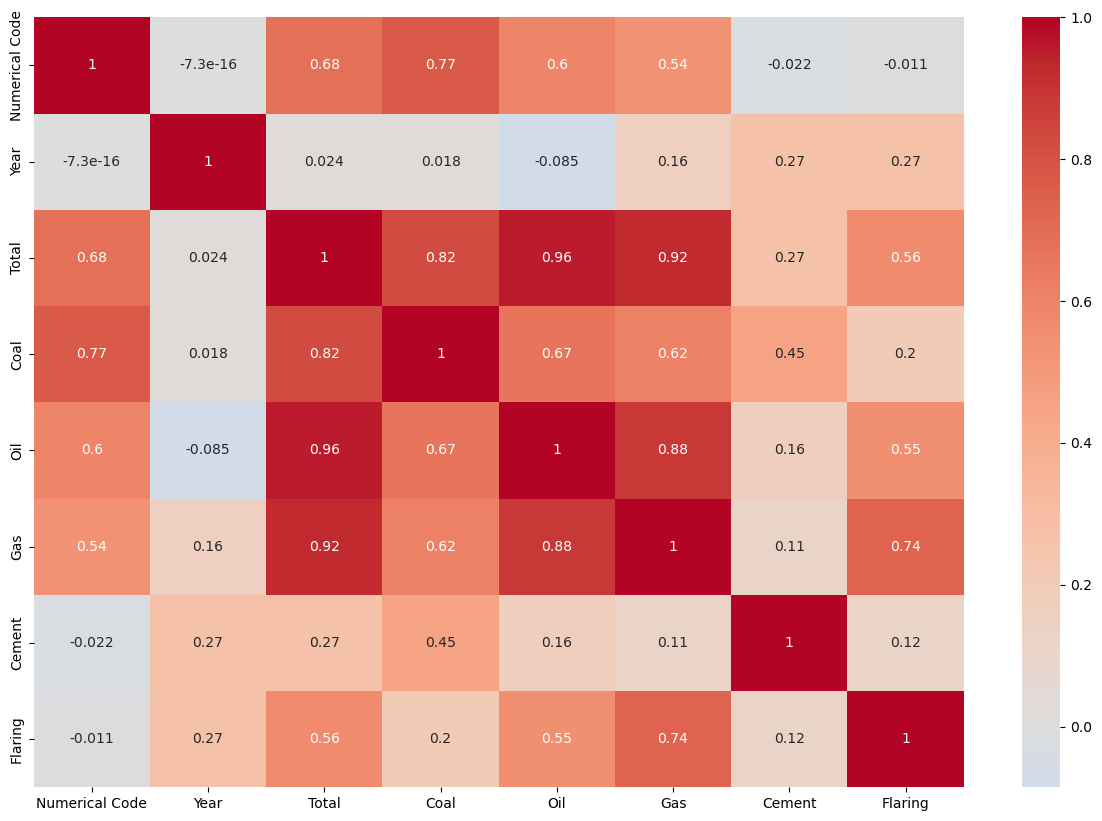

In [1157]:
plt.figure(figsize=(15,10))
sns.heatmap(data = x.corr(numeric_only=True),
            cmap= 'coolwarm',
            center = 0,                         
            annot = True) 

Notes : 
- 'Other' column null -> removed
- Choose data where Year is 1962 - 2022

In [ ]:
x.drop(columns= 'Other', inplace= True)
x = x[x['Year'].between(1962, 2022)]

In [ ]:
x['Country'] = x['Country'].replace({'USA': 'United States'})   # To have similar name with other dataset

In [968]:
x.isna().sum()

Country           0
Code              0
Numerical Code    0
Year              0
Total             0
Coal              0
Oil               0
Gas               0
Cement            0
Flaring           0
dtype: int64

In [ ]:
# Check duplicate
x.duplicated().sum()

0

##### **X Missing Value Handing**

Notes : Since the data's has no null values anymore, data is ready to use!

In [ ]:
# Convert to new dataframe name
df_x = x

**Notes:** df_x data ready to use!

#### **Y data cleaning** 

In [931]:
pd.set_option("display.max_columns", None)
y.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Renewable Energy,Convention Energy
2937,Brazil,1900,BRA,18058538.0,1.571802e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2938,Brazil,1901,BRA,18463951.0,1.728848e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2939,Brazil,1902,BRA,18869255.0,1.729822e+10

**Notes:** In this analysis, only several column that correlated with the analyses goals

In [932]:
y = y[['country', 'year', 'iso_code', 'population', 'gdp', 'energy_per_capita','primary_energy_consumption', 'renewables_consumption', 'biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption', 'Renewable Energy', 'Convention Energy']]
y.head()

,country,year,iso_code,population,gdp,energy_per_capita,primary_energy_consumption,renewables_consumption,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption,Renewable Energy,Convention Energy
2937,Brazil,1900,BRA,18058538.0,1.571802e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2938,Brazil,1901,BRA,18463951.0,1.728848e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2939,Brazil,1902,BRA,18869255.0,1.729822e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2940,Brazil,1903,BRA,19274237.0,1.764560e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2941,Brazil,1904,BRA,19687910.0,1.798087e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [933]:
y = y[y['year'].between(1962, 2022)]        # Choose data only year 1962-2022

In [934]:
y.isna().sum()

country                          0
year                             0
iso_code                         0
population                       0
gdp                              0
energy_per_capita               15
primary_energy_consumption      15
renewables_consumption          15
biofuel_consumption            137
coal_consumption                15
fossil_fuel_consumption         15
gas_consumption                 15
hydro_consumption               15
low_carbon_consumption          15
nuclear_consumption             15
oil_consumption                 15
other_renewable_consumption     36
solar_consumption              114
wind_consumption               104
Renewable Energy               157
Convention Energy               15
dtype: int64

<Axes: >

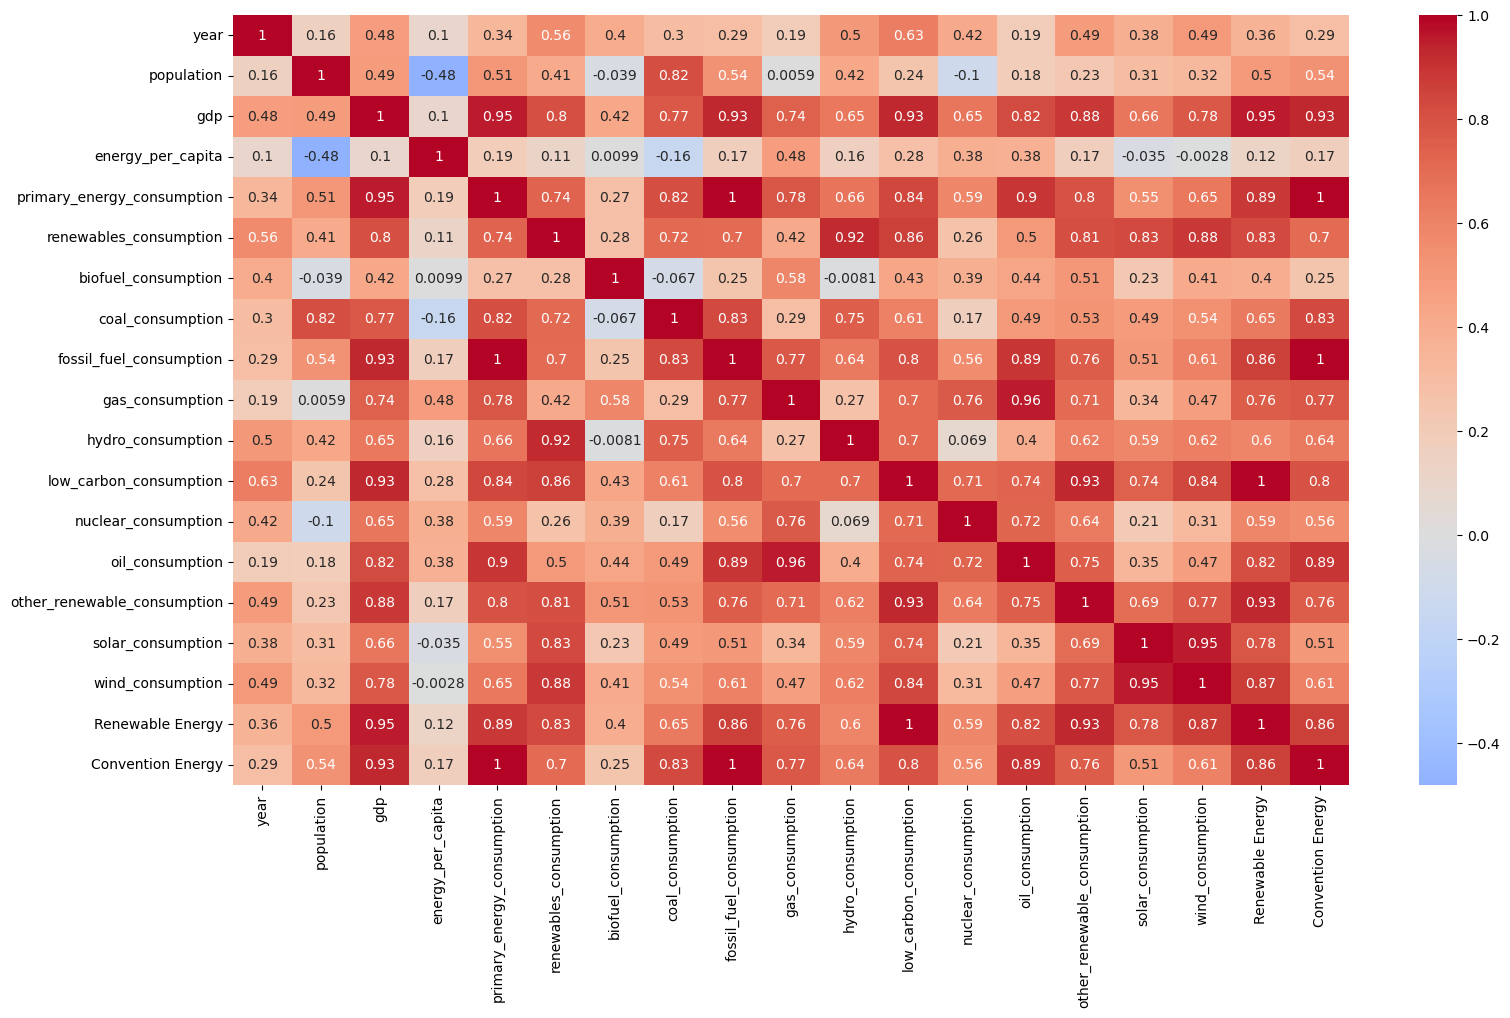

In [935]:
plt.figure(figsize=(18,10))
sns.heatmap(data = y.corr(numeric_only=True),
            cmap= 'coolwarm',
            center = 0,                         # Put parameter 0 as the lowest
            annot = True) 

##### **Y Data Cleaning Handling**

**Notes:** First, check the lenght of each countries to compare with NaN counted data each countries throughout the table

In [936]:
# Check data lenght each countries
country_leny = (
    y.groupby("country")
           .size()
           .reset_index(name="Row_Count"))
country_leny.head(50)

,country,Row_Count
0,Brazil,61
1,Canada,61
2,China,61
3,France,61
4,United States,61


In [937]:
# Check count of NaN values using pivot table

values = ['gdp', 'energy_per_capita', 'primary_energy_consumption', 'renewables_consumption', 'biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']

nan_pivot = pd.pivot_table(
    data=y,
    index='country',
    values= values,
    aggfunc=lambda x: x.isna().sum())
nan_pivot

,biofuel_consumption,coal_consumption,energy_per_capita,fossil_fuel_consumption,gas_consumption,gdp,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
country,,,,,,,,,,,,,,,
Brazil,8,3,3,3,3,0,3,3,3,3,8,3,3,28,23
Canada,33,3,3,3,3,0,3,3,3,3,13,3,3,28,23
China,38,3,3,3,3,0,3,3,3,3,9,3,3,9,9
France,30,3,3,3,3,0,3,3,3,3,3,3,3,28,28
United States,28,3,3,3,3,0,3,3,3,3,3,3,3,21,21


##### **Y Missing Value Handing**

**Notes:** 
Based on NaN count pivot tables, the cata concluded has a similar types of missing values each countries
1. Have a similar missing value count throughout the data
    - Through random checking, the missing values is placed on earlier year. Hence, the missing values is replaced with min values

In [938]:
# Missing value handling -> using min
y_clean = y.groupby("country").apply(lambda g: g.fillna(g.min())).reset_index(drop=True)

/var/folders/4q/0dkksm5d6d97x0wkwnws9dwh0000gn/T/ipykernel_1640/4095480286.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  y_clean = y.groupby("country").apply(lambda g: g.fillna(g.min())).reset_index(drop=True)


In [939]:
y_clean.isna().sum()

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
energy_per_capita              0
primary_energy_consumption     0
renewables_consumption         0
biofuel_consumption            0
coal_consumption               0
fossil_fuel_consumption        0
gas_consumption                0
hydro_consumption              0
low_carbon_consumption         0
nuclear_consumption            0
oil_consumption                0
other_renewable_consumption    0
solar_consumption              0
wind_consumption               0
Renewable Energy               0
Convention Energy              0
dtype: int64

In [940]:
df_y = y_clean

**Notes:** y data ready to use!

##### **Z Data Cleaning Handling**

In [1040]:
z.head()

,alpha3,continent_x,rank,previousRank,assetCount,alpha2,name,continent_y,emissions_co2,emissions_ch4,emissions_n2o,emissions_co2e_100yr,emissions_co2e_20yr,worldEmissions_co2,worldEmissions_ch4,worldEmissions_n2o,worldEmissions_co2e_100yr,worldEmissions_co2e_20yr,emissionsChange_co2,emissionsChange_ch4,emissionsChange_n2o,emissionsChange_co2e_100yr,emissionsChange_co2e_20yr
98,FRA,null,24,0,None,FR,France,Europe,3.826018e+09,2.477290e+07,1.230604e+06,4.990663e+09,6.459437e+09,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11,None,None,None,None,None
100,CHN,null,1,0,None,CN,China,Asia,1.327073e+11,7.098295e+08,1.334496e+07,1.614256e+11,2.010197e+11,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11,None,None,None,None,None
196,USA,null,2,0,None,US,United States of America,North America,5.538847e+10,3.150451e+08,6.864557e+06,6.848538e+10,8.695273e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11,None,None,None,None,None
233,CAN,null,10,0,None,CA,Canada,North America,7.295879e+09,4.263645e+07,1.611950e+06,9.160262e+09,1.155829e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11,None,None,None,None,None
234,BRA,null,5,0,None,BR,Brazil,South America,8.382456e+09,1.923174e+08,5.942782e+06,1.541202e+10,2.573797e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11,None,None,None,None,None


In [1041]:
len(z)

5

In [1042]:
z.isna().sum()

alpha3                        0
continent_x                   0
rank                          0
previousRank                  0
assetCount                    5
alpha2                        0
name                          0
continent_y                   0
emissions_co2                 0
emissions_ch4                 0
emissions_n2o                 0
emissions_co2e_100yr          0
emissions_co2e_20yr           0
worldEmissions_co2            0
worldEmissions_ch4            0
worldEmissions_n2o            0
worldEmissions_co2e_100yr     0
worldEmissions_co2e_20yr      0
emissionsChange_co2           5
emissionsChange_ch4           5
emissionsChange_n2o           5
emissionsChange_co2e_100yr    5
emissionsChange_co2e_20yr     5
dtype: int64

<Axes: >

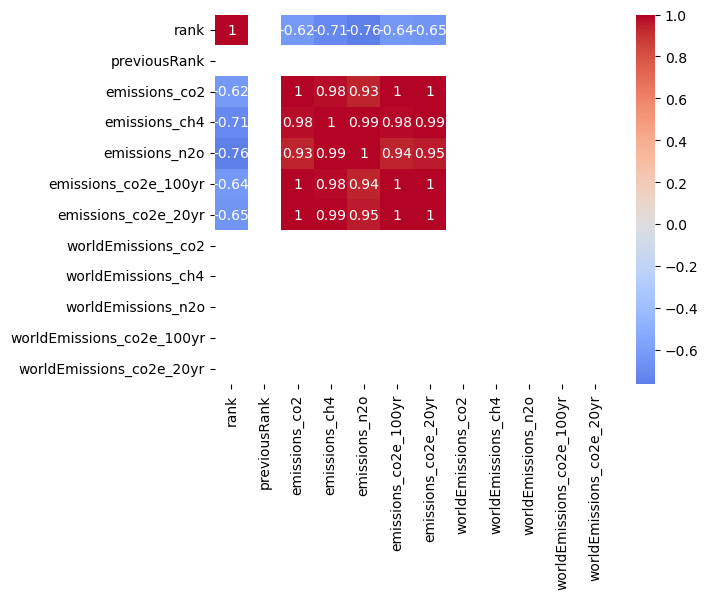

In [ ]:
sns.heatmap(data = z.corr(numeric_only=True),
            cmap= 'coolwarm',
            center = 0,                         
            annot = True) 

Notes : Remove assetcount and emission change due to null data, as well as previous rank since has no giev any information

In [1044]:
z.drop(columns= ['previousRank','assetCount', 'emissionsChange_co2', 'emissionsChange_ch4', 'emissionsChange_n2o', 'emissionsChange_co2e_100yr', 'emissionsChange_co2e_20yr'], inplace=True)

In [1045]:
df_z = z

**Notes:** z data ready to use!

## **C. Data Exploration**

### **Data Convirmation**

In [971]:
df_x.head()

,Country,Code,Numerical Code,Year,Total,Coal,Oil,Gas,Cement,Flaring
7583,Brazil,BRA,76,1962,0.690899,0.073040,0.577660,0.001416,0.032079,0.006704
7584,Brazil,BRA,76,1963,0.694771,0.067810,0.586997,0.002063,0.031712,0.006190
7585,Brazil,BRA,76,1964,0.688359,0.075001,0.571325,0.001960,0.033304,0.006770
7586,Brazil,BRA,76,1965,0.665052,0.082054,0.540821,0.002295,0.032218,0.007664
7587,Brazil,BRA,76,1966,0.737675,0.096171,0.596195,0.002822,0.033598,0.008888


In [942]:
df_y.head()

,country,year,iso_code,population,gdp,energy_per_capita,primary_energy_consumption,renewables_consumption,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption,Renewable Energy,Convention Energy
0,Brazil,1962,BRA,77599224.0,2.821822e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
1,Brazil,1963,BRA,79915560.0,2.837410e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
2,Brazil,1964,BRA,82262800.0,2.933856e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
3,Brazil,1965,BRA,84623752.0,3.005470e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
4,Brazil,1966,BRA,86979288.0,3.205837e+11,3435.072,298.78,82.518,2.949,21.864,216.262,0.600,82.518,82.518,0.0,193.798,1.643,0.0,0.0,1407.403,432.524


In [943]:
df_z.head()

,alpha3,continent_x,rank,alpha2,name,continent_y,emissions_co2,emissions_ch4,emissions_n2o,emissions_co2e_100yr,emissions_co2e_20yr,worldEmissions_co2,worldEmissions_ch4,worldEmissions_n2o,worldEmissions_co2e_100yr,worldEmissions_co2e_20yr
98,FRA,null,24,FR,France,Europe,3.826018e+09,2.477290e+07,1.230604e+06,4.990663e+09,6.459437e+09,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
100,CHN,null,1,CN,China,Asia,1.327073e+11,7.098295e+08,1.334496e+07,1.614256e+11,2.010197e+11,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
196,USA,null,2,US,United States of America,North America,5.538847e+10,3.150451e+08,6.864557e+06,6.848538e+10,8.695273e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
233,CAN,null,10,CA,Canada,North America,7.295879e+09,4.263645e+07,1.611950e+06,9.160262e+09,1.155829e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
234,BRA,null,5,BR,Brazil,South America,8.382456e+09,1.923174e+08,5.942782e+06,1.541202e+10,2.573797e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11


### **Data Exploration**

#### **Q1. Annual Convention Energy Carbon Emission**
How is the correlation between a country's convention energy and its annual carbon emissions the last 6 decades?

**Countries Carbon Emission from Conventional Energy**

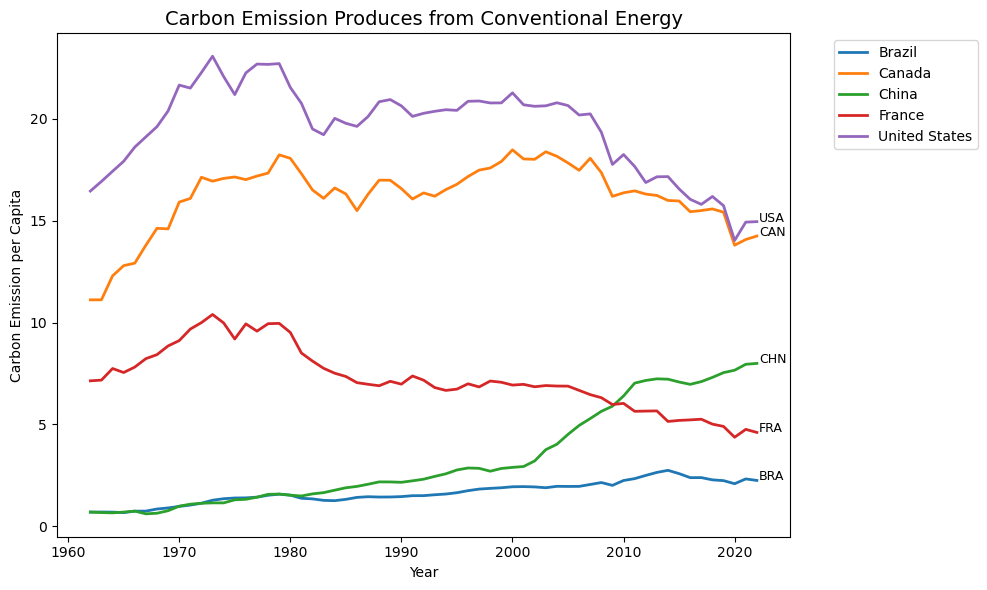

In [1007]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_x, x="Year", y="Total", hue="Country", linewidth=2)  

for country, subset in df_x.groupby("Code"):
    plt.text(
        x=subset["Year"].max() + 0.2,     
        y=subset.loc[subset["Year"].idxmax(), "Total"],  
        s=country,
        fontsize=9
    )

plt.title("Carbon Emission Produces from Conventional Energy", fontsize=14)
plt.ylabel("Carbon Emission per Capita")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


**Countries Convention Energy Consumption**

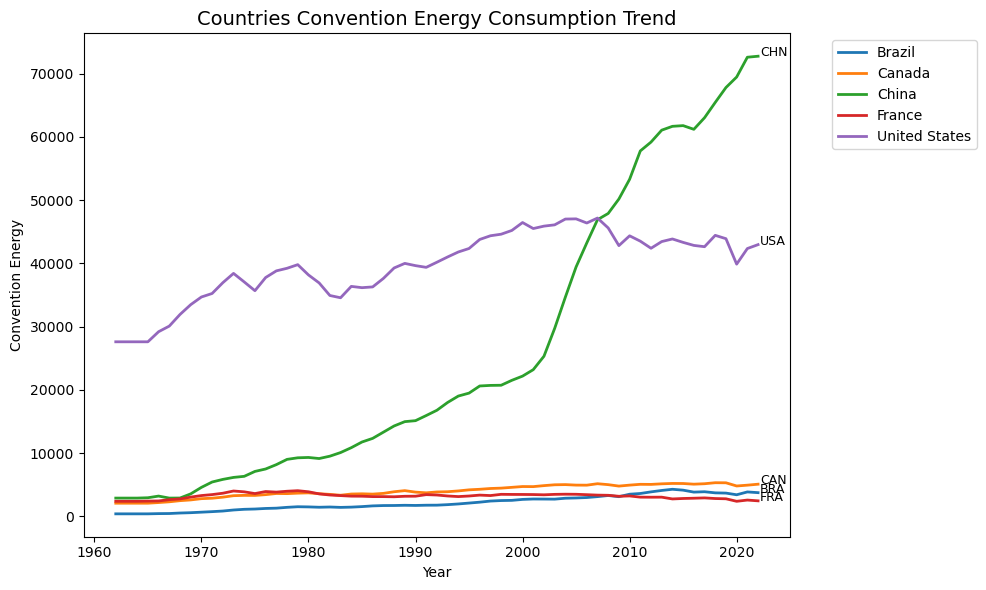

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_y, x="year", y="Convention Energy", hue="country", linewidth=2)  

for country, subset in df_y.groupby("iso_code"):
    plt.text(
        x=subset["year"].max() + 0.2,     
        y=subset.loc[subset["year"].idxmax(), "Convention Energy"],  
        s=country,
        fontsize=9
    )

plt.title("Countries Convention Energy Consumption Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Convention Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

#### **Q2. Annual Renewable Energy Emission**
What is the correlation between a country's renewable energy and its annual emissions the last 6 decades?

**Countries Renewable Energy Consumption**

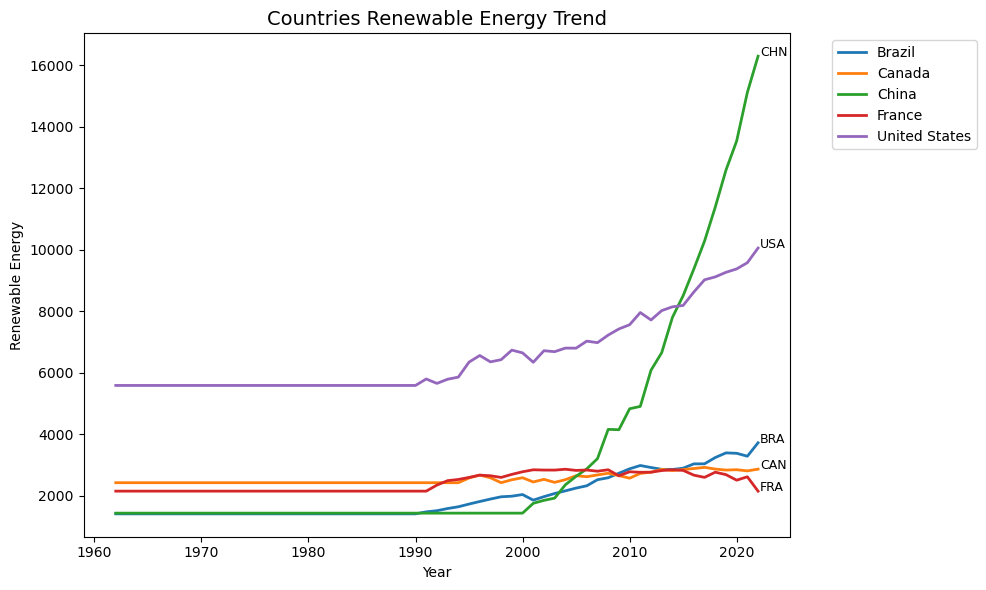

In [983]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_y, x="year", y="Renewable Energy", hue="country", linewidth=2)  

for country, subset in df_y.groupby("iso_code"):
    plt.text(
        x=subset["year"].max() + 0.2,     # slightly to the right of last x
        y=subset.loc[subset["year"].idxmax(), "Renewable Energy"],  # y at last point
        s=country,
        fontsize=9
    )

plt.title("Countries Renewable Energy Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Renewable Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

#### **Q3. Gas Emission Trend**
How is the proportion of gas emission type and countries who produce the emission globally?

**Countries Carbon Emission from Current Energy Consumption**

In [1052]:
df_z.rename(columns= {'name' : 'Country'}, inplace=True)

df_z['Total Emission'] = df_z['emissions_co2'] + df_z['emissions_ch4'] + df_z['emissions_n2o']
df_z['Total World Emission'] = df_z['worldEmissions_co2'] + df_z['worldEmissions_ch4'] + df_z['worldEmissions_n2o']
df_z['Worldwide Percentage'] = df_z['Total Emission']/df_z['Total World Emission']

In [1051]:
df_z.head()

,alpha3,continent_x,rank,alpha2,name,continent_y,emissions_co2,emissions_ch4,emissions_n2o,emissions_co2e_100yr,emissions_co2e_20yr,worldEmissions_co2,worldEmissions_ch4,worldEmissions_n2o,worldEmissions_co2e_100yr,worldEmissions_co2e_20yr
98,FRA,null,24,FR,France,Europe,3.826018e+09,2.477290e+07,1.230604e+06,4.990663e+09,6.459437e+09,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
100,CHN,null,1,CN,China,Asia,1.327073e+11,7.098295e+08,1.334496e+07,1.614256e+11,2.010197e+11,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
196,USA,null,2,US,United States of America,North America,5.538847e+10,3.150451e+08,6.864557e+06,6.848538e+10,8.695273e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
233,CAN,null,10,CA,Canada,North America,7.295879e+09,4.263645e+07,1.611950e+06,9.160262e+09,1.155829e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11
234,BRA,null,5,BR,Brazil,South America,8.382456e+09,1.923174e+08,5.942782e+06,1.541202e+10,2.573797e+10,4.470795e+11,3.807025e+09,8.403048e+07,5.918070e+11,8.034762e+11


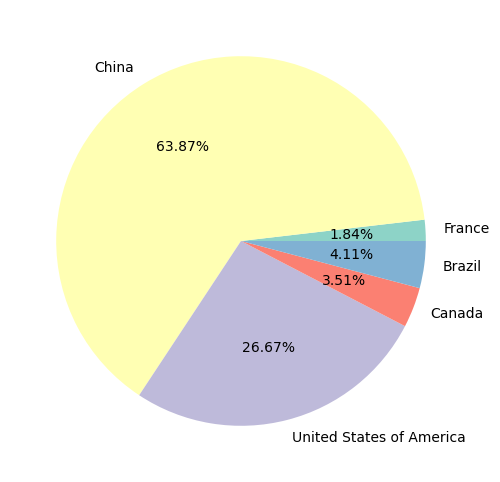

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(x  = df_z['Total Emission (Billion)'], 
        labels= df_z['Country'],
        autopct='%.2f%%',
        colors=plt.cm.Set3.colors)           # 2 decimal number

plt.show()

**Gas Emission types values data spread**

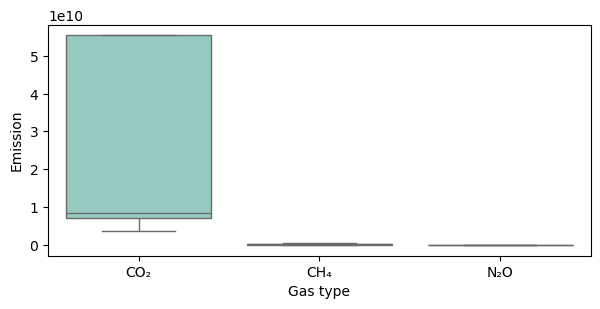

In [1155]:
plt.figure(figsize=(7,3))
cols = ['emissions_co2', 'emissions_ch4', 'emissions_n2o']

df_melted = df_z[cols].melt(var_name='Gas type', value_name='Emission')

df_melted['Gas type'] = df_melted['Gas type'].replace({
    'emissions_co2': 'CO₂',
    'emissions_ch4': 'CH₄',
    'emissions_n2o': 'N₂O'
})

sns.boxplot(x='Gas type', y='Emission', data=df_melted, showfliers=False, palette=plt.cm.Set3.colors)
plt.show()

**Countries Carbon Emission Percentage from Current Energy Consumption**
- How does the percentage of renewable energy in a country's energy mix relate to its carbon emission per capita?

In [1054]:
df_z['Total Emission (Billion)'] = df_z['Total Emission'] / 1e9

Percentage = df_z[['Country', 'Worldwide Percentage', 'Total Emission (Billion)']].sort_values(by='Worldwide Percentage', ascending=False)
Percentage.index + 1
Percentage

,Country,Worldwide Percentage,Total Emission (Billion)
100,China,0.295874,133.430464
196,United States of America,0.123534,55.710381
234,Brazil,0.019027,8.580716
233,Canada,0.016276,7.340127
98,France,0.008542,3.852021


#### **Q4. Convention Energy vs Renewable Energy**
How is the trend between convention energy consumption with renwable energy consumption?

**Relationship between Conventional Energy and Renewable energy**

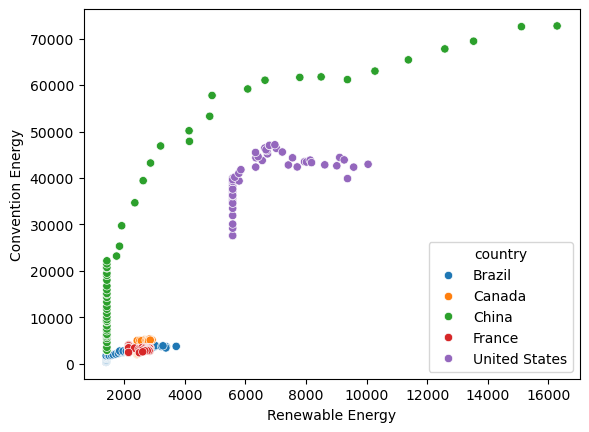

In [1034]:
sns.scatterplot(data=df_y,
                x = 'Renewable Energy',
                y = 'Convention Energy',
                hue='country'
                )
plt.show()

In [ ]:
# Since the some countries trend arent visualized enought, create new df consist only 3 countries for detail scatter plot
three = ['BRA', 'FRA', 'CAN']
newy = y[y['iso_code'].isin(three)]

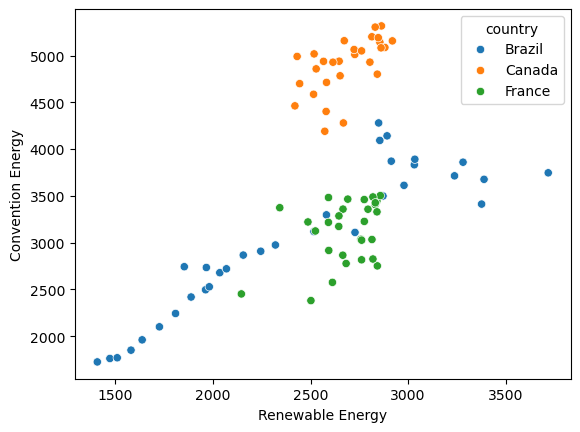

In [ ]:
sns.scatterplot(data=newy,
                x = 'Renewable Energy',
                y = 'Convention Energy',
                hue='country'
                )
plt.show()

**Put the data together for visualization**

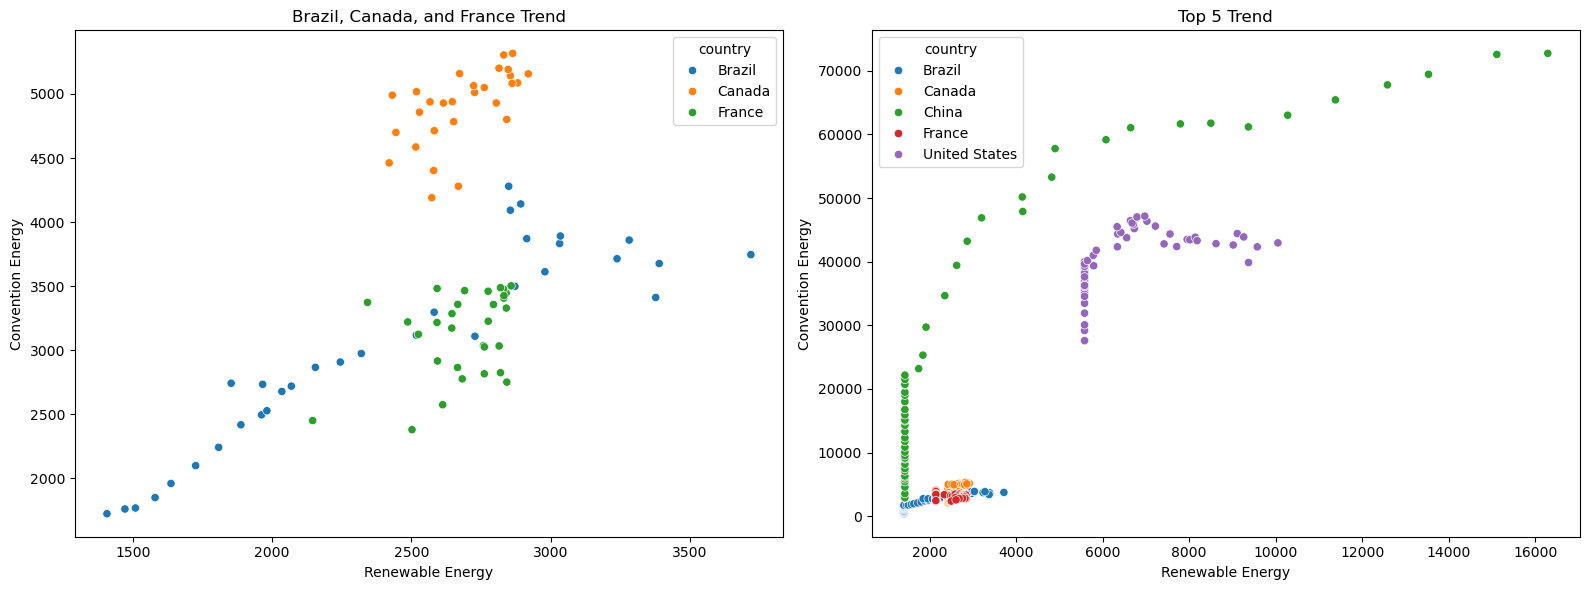

In [1139]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left plot: Renewable Energy vs GDP
sns.scatterplot(data=df_y,
                x = 'Renewable Energy',
                y = 'Convention Energy',
                hue='country',
                ax=axes[1])
  
axes[1].set_title("Top 5 Trend")

# Right plot: Conventional Energy vs GDP
sns.scatterplot(data=newy,
                x = 'Renewable Energy',
                y = 'Convention Energy',
                hue='country',
                ax=axes[0])

axes[0].set_title("Brazil, Canada, and France Trend")

plt.tight_layout()
plt.show()

**Renewable energy and Convention energy trend throughout the year**

Scale energy consumption values

In [1158]:
df_y.head()

,country,year,iso_code,population,gdp,energy_per_capita,primary_energy_consumption,renewables_consumption,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption,Renewable Energy,Convention Energy
0,Brazil,1962,BRA,77599224.0,2.821822e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
1,Brazil,1963,BRA,79915560.0,2.837410e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
2,Brazil,1964,BRA,82262800.0,2.933856e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
3,Brazil,1965,BRA,84623752.0,3.005470e+11,3236.321,273.87,75.448,2.949,20.178,198.422,0.513,75.448,75.448,0.0,177.731,1.643,0.0,0.0,1407.403,396.844
4,Brazil,1966,BRA,86979288.0,3.205837e+11,3435.072,298.78,82.518,2.949,21.864,216.262,0.600,82.518,82.518,0.0,193.798,1.643,0.0,0.0,1407.403,432.524


In [1074]:
from sklearn.preprocessing import MinMaxScaler

scale = df_y[['country', 'year', 'Renewable Energy', 'Convention Energy']]

# choose the columns you want to scale
column = ['Renewable Energy', 'Convention Energy']

scaler = MinMaxScaler()
scale[column] = scaler.fit_transform(scale[column])

scale.head()

,country,year,Renewable Energy,Convention Energy
0,Brazil,1962,0.0,0.000000
1,Brazil,1963,0.0,0.000000
2,Brazil,1964,0.0,0.000000
3,Brazil,1965,0.0,0.000000
4,Brazil,1966,0.0,0.000493


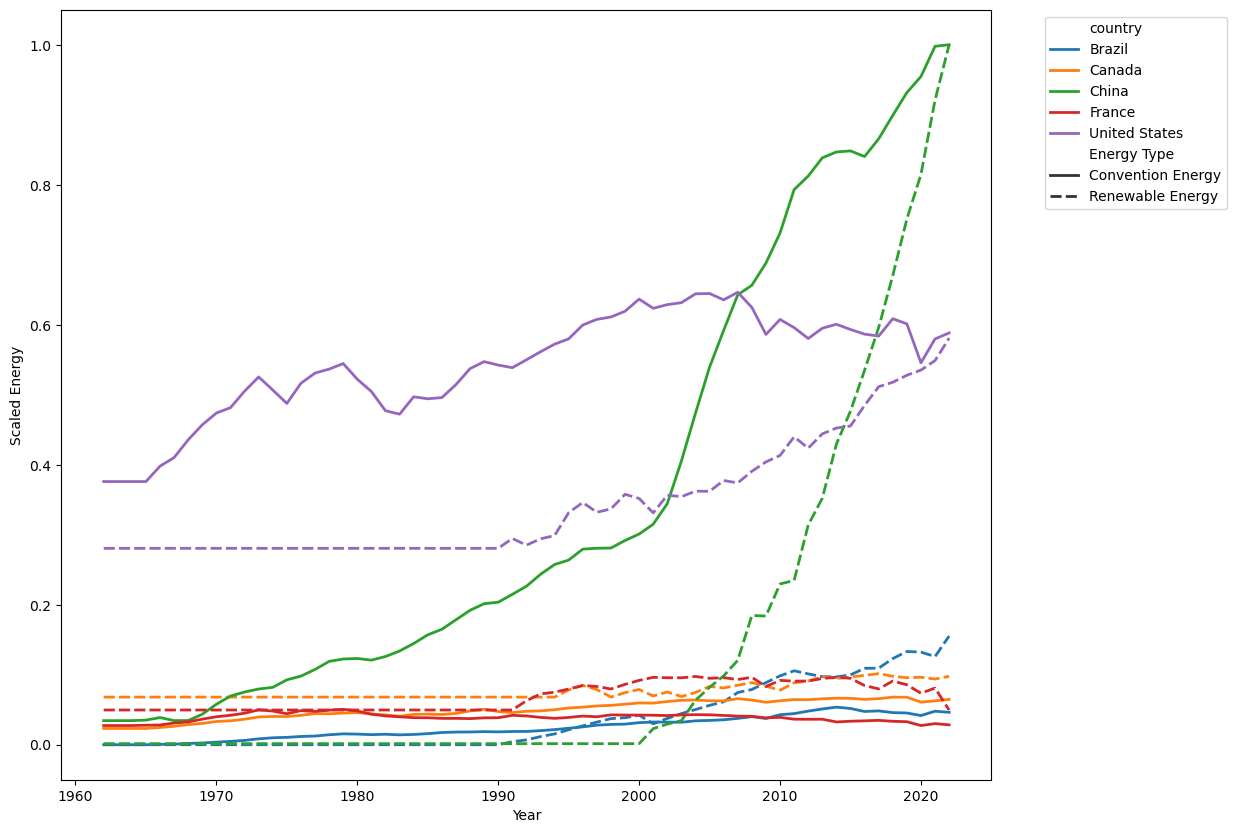

In [1077]:
# Melt the dataframe
scale_melted = scale.melt(
    id_vars=["country", "year"],
    value_vars=["Convention Energy", "Renewable Energy"],
    var_name="Energy Type",
    value_name="Value"
)

plt.figure(figsize=(12,10))

sns.lineplot(
    data=scale_melted,
    x="year",
    y="Value",
    hue="country",               # color by country
    style="Energy Type",         # solid vs dashed
    palette="tab10",
    linewidth=2
)

plt.ylabel("Scaled Energy")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Put the data together for visualization**

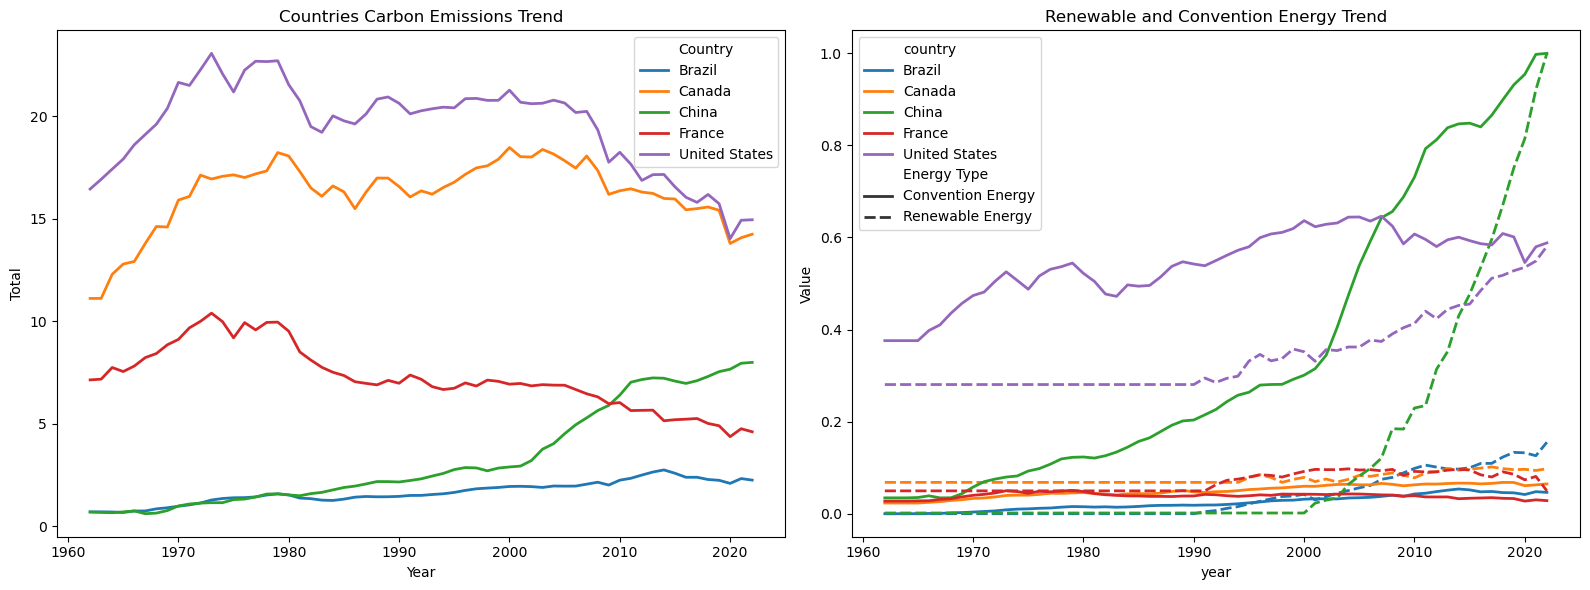

In [1156]:
scale_melted = scale.melt(
    id_vars=["country", "year"],
    value_vars=["Convention Energy", "Renewable Energy"],
    var_name="Energy Type",
    value_name="Value"
)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left plot: Renewable Energy vs GDP
sns.lineplot(
    data=df_x, 
    x="Year", 
    y="Total", 
    hue="Country", 
    linewidth=2,
    ax=axes[0])
  
axes[0].set_title("Countries Carbon Emissions Trend")

# Right plot: Conventional Energy vs GDP
sns.lineplot(
    data=scale_melted,
    x="year",
    y="Value",
    hue="country",               # color by country
    style="Energy Type",         # solid vs dashed
    palette="tab10",
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title("Renewable and Convention Energy Trend")

plt.tight_layout()
plt.show()

#### **Q5. GDP and Population Relation to Energy Consumption?**
- How do economic factors, like GDP, correlate with CO2 emissions in countries?

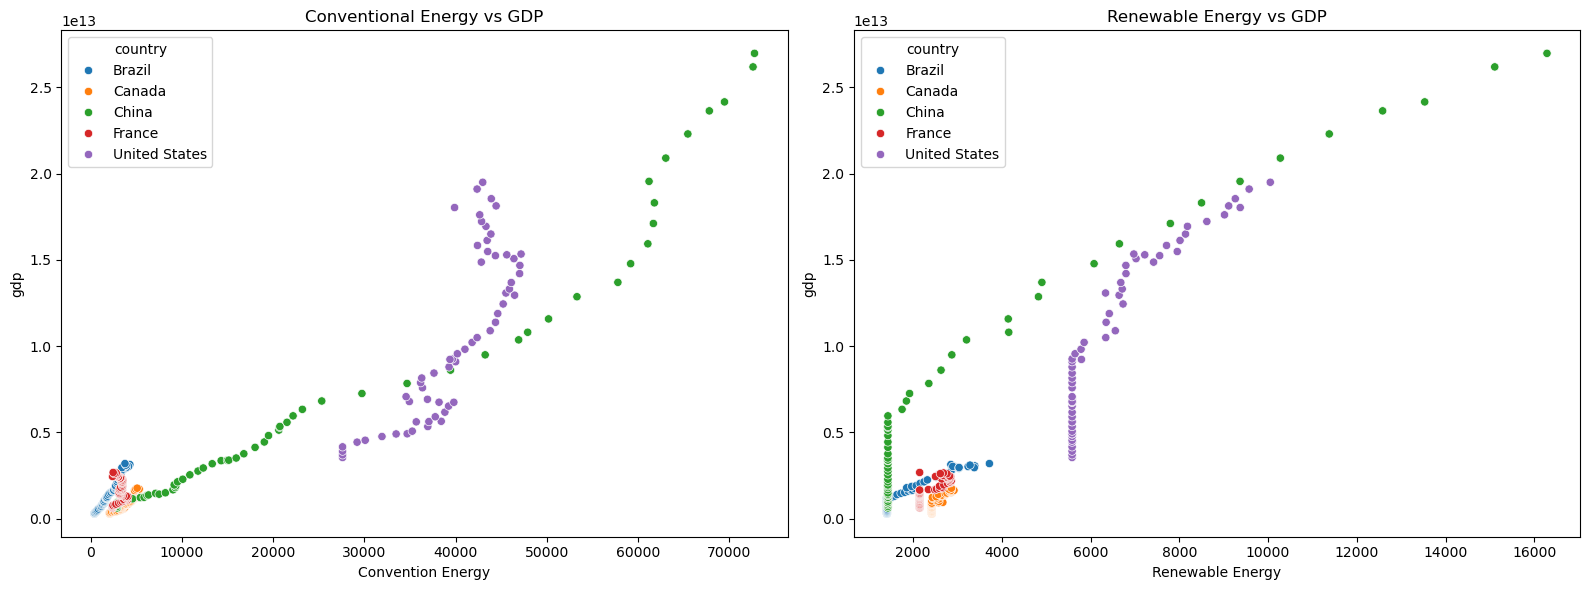

In [1135]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left plot: Renewable Energy vs GDP
sns.scatterplot(
    data=df_y,
    x="Renewable Energy",
    y="gdp",
    hue="country",
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Renewable Energy vs GDP")

# Right plot: Conventional Energy vs GDP
sns.scatterplot(
    data=df_y,
    x="Convention Energy",
    y="gdp",
    hue="country",
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Conventional Energy vs GDP")

plt.tight_layout()
plt.show()



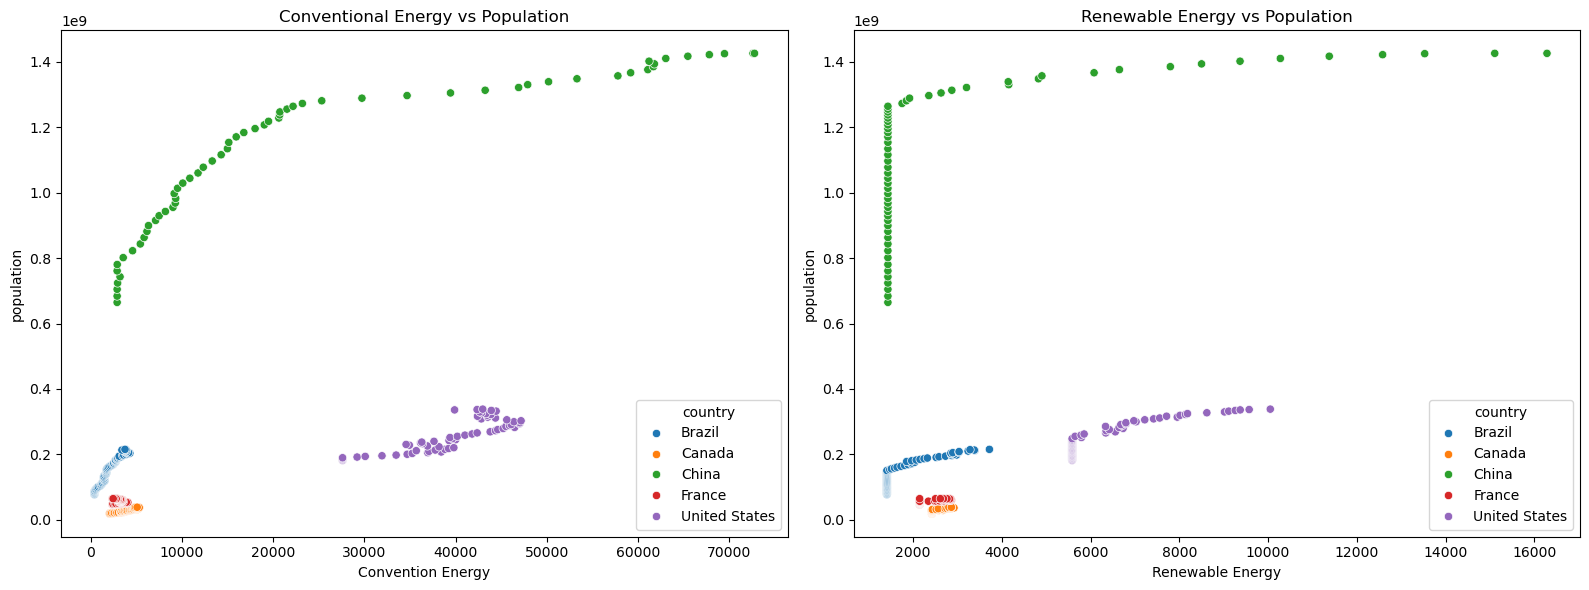

In [1134]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left plot: Renewable Energy vs GDP
sns.scatterplot(
    data=df_y,
    x="Renewable Energy",
    y="population",
    hue="country",
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Renewable Energy vs Population")

# Right plot: Conventional Energy vs GDP
sns.scatterplot(
    data=df_y,
    x="Convention Energy",
    y="population",
    hue="country",
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Conventional Energy vs Population")

plt.tight_layout()
plt.show()



## **D. Insight and Analysis**

#### **Gas Emissions**
- Among the gas types, CO₂ accounts for the largest share of global emissions
- China has a significant percentage of the global emissions distribution

#### **Countries GDP**
- Countries with higher GDP tend to have greater renewable energy development.

#### **Countries population**
- China’s high energy consumption is strongly correlated with its large population size.
- Although Brazil and the United States have comparable population sizes, their energy consumption differs significantly

#### **Convention energy vs Renewable energy**
- China, Brazil and The United States of America are constantly grew its renewable energy production

#### **Energy consumption vs Carbon Emission**
- Over the past four decades, global carbon emissions have shown a gradual declining trend.
- The majority of countries appear to be transitioning from conventional to renewable energy sources.

## **E. Conclusion**

- CO₂ remains the dominant greenhouse gas contributing to global emissions
- Most countries are shifting from conventional to renewable energy sources, indicating a global movement toward sustainability
- Countries with higher GDP tend to increase their renewable energy adoption, suggesting an economic capacity to support energy transition.
- While population size strongly influences total energy consumption (e.g., China), differences in energy efficiency and policy (e.g., Brazil vs. the US) also play a key role.
- The overall evidence suggests that greater adoption of renewable energy is associated with reduced carbon emissions, though the effect is gradual and influenced by economic and demographic factors.


## **F. Conclusion**

- Strengthen renewable energy policies – Governments should continue and accelerate incentives for renewable energy adoption to further reduce emissions.
- Promote energy efficiency – Especially in countries with high consumption, improving efficiency can complement the benefits of renewable energy.
- Support emerging economies – Since GDP is linked with renewable adoption, international cooperation and financing could help lower-income countries transition faster.
- Monitor long-term emission trends – Continued tracking is needed, as reductions are slow and require sustained global effort.
- Encourage diversified renewable portfolios – Relying not only on solar or wind, but also hydro, geothermal, and biomass, to maximize impact.